In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold

In [12]:
at = pd.read_csv('Attack_types.txt',sep=' ')
df = pd.read_csv('Dataset.txt', sep=",")
df = pd.merge(df,at,on="attack_category",how="left")
df['attack_type'] = df['attack_type'].fillna('others')
df.loc[df['attack_category'] == 'normal', 'attack_type'] = 'normal'
df.drop_duplicates(subset=None, keep='first', inplace=True)
df = df.drop('attack_category',axis=1)

le = LabelEncoder()
df['attack_type'] = le.fit_transform(df['attack_type'])
df['protocol_type'] = le.fit_transform(df['protocol_type'])

label = df.pop('attack_type')

selector = VarianceThreshold(threshold=0.9)

df = df.apply(pd.to_numeric, errors='coerce')

selector.fit(df)

refined_data = selector.transform(df)

selected_indices = selector.get_support(indices=True)

refined_df = df.iloc[:, selected_indices]

df = refined_df

y = label

Sum_of_Squares = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    Sum_of_Squares.append(kmeans.inertia_)

/home/h/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_variance_threshold.py:111: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/h/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f37c2fcea60>
Traceback (most recent call last):
  File "/home/h/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/h/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/h/anaconda3/lib/python3.9/s

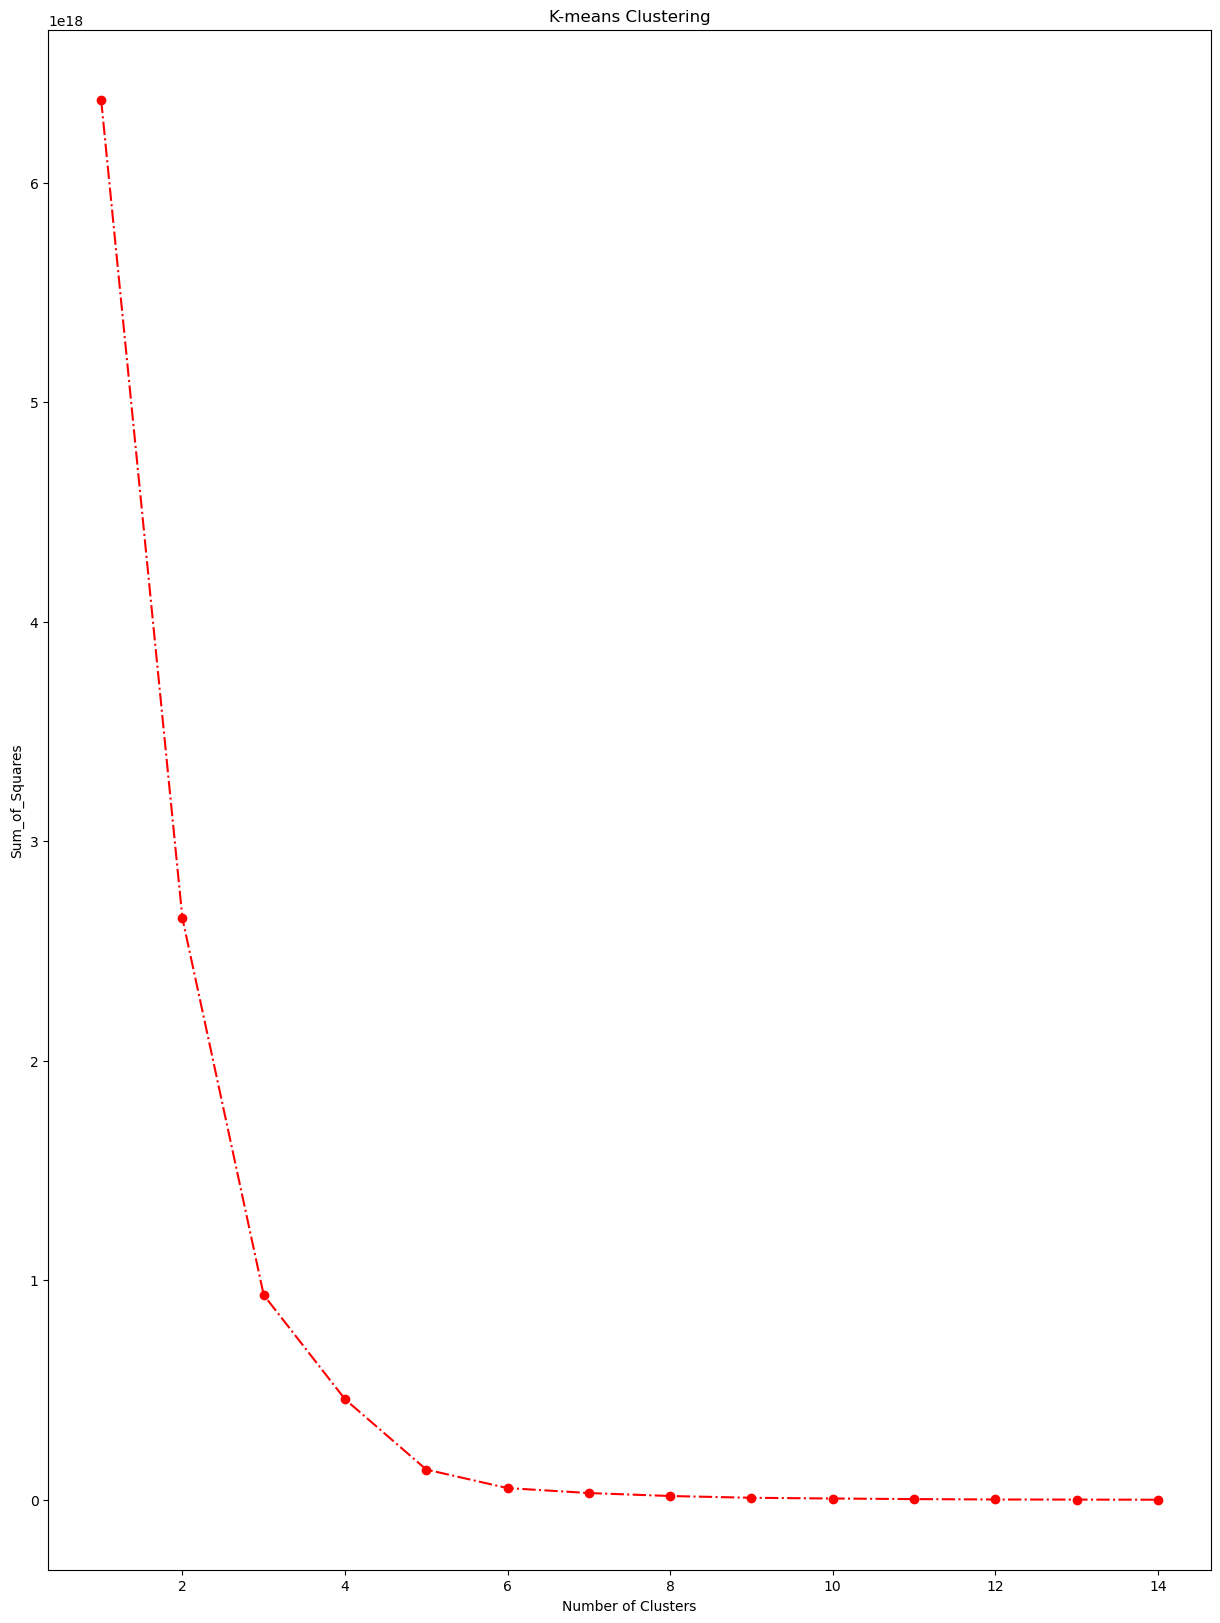

In [13]:
plt.figure(figsize = (15,20))
plt.plot(range(1, 15), Sum_of_Squares, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum_of_Squares')
plt.title('K-means Clustering')
plt.show()

# K = 5

In [15]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(df)
y_mean = kmeans.fit_predict(df)
y_mean

/home/h/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f37bc3fcc10>
Traceback (most recent call last):
  File "/home/h/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/h/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/h/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/h/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
  

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [16]:
df['k'] = kmeans.labels_
df.head()

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,count,srv_count,dst_host_count,dst_host_srv_count,occurance,k
0,0,491,0,0,0,0,2,2,150,25,20,0
1,0,146,0,0,0,0,13,1,255,1,15,0
2,0,0,0,0,0,0,123,6,255,26,19,0
3,0,232,8153,0,0,0,5,5,30,255,21,0
4,0,199,420,0,0,0,30,32,255,255,21,0


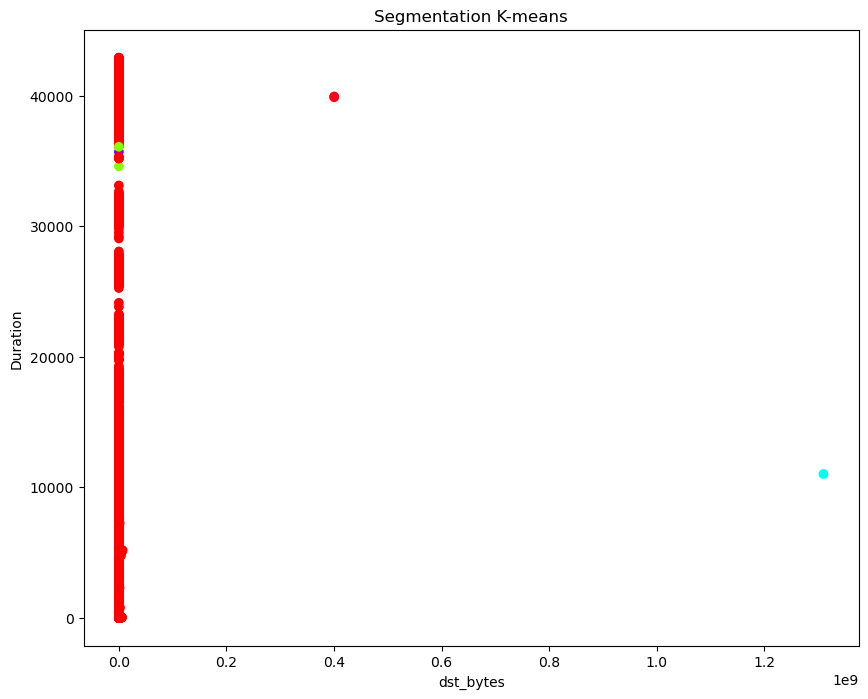

In [33]:
x_axis = df['dst_bytes']
y_axis = df['duration']
plt.figure(figsize = (10, 8))
color_map = plt.cm.get_cmap('hsv', len(np.unique(df['k'])))
plt.xlabel('dst_bytes')
plt.ylabel('Duration')
plt.scatter(x_axis, y_axis, c=df['k'],cmap=color_map)
plt.title('Segmentation K-means')
plt.show()

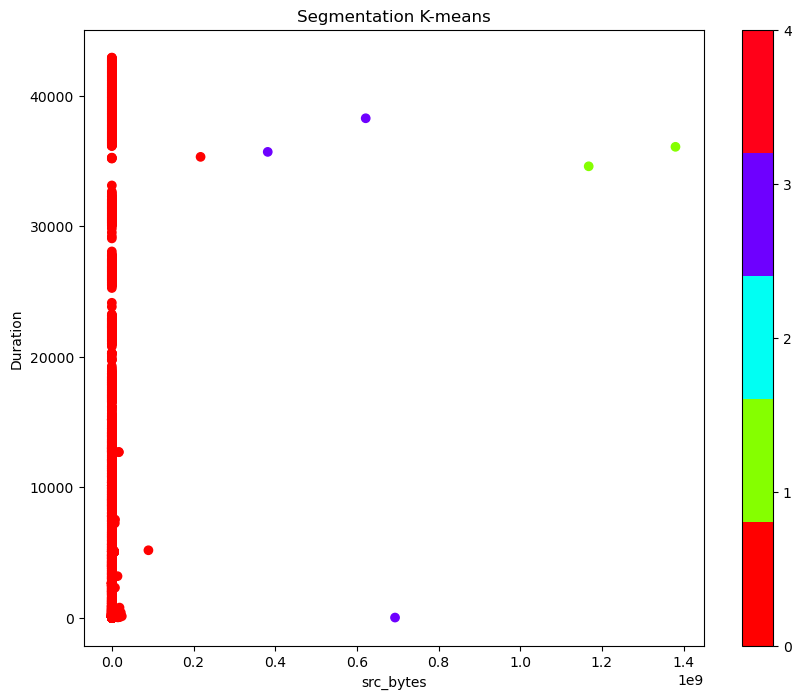

In [34]:
x_axis = df['src_bytes']
y_axis = df['duration']
plt.figure(figsize=(10, 8))
color_map = plt.cm.get_cmap('hsv', len(np.unique(df['k'])))
plt.xlabel('src_bytes')
plt.ylabel('Duration')
scatter = plt.scatter(x_axis, y_axis, c=df['k'], cmap=color_map)
plt.title('Segmentation K-means')
plt.colorbar(scatter, ticks=np.unique(df['k']))
plt.show()

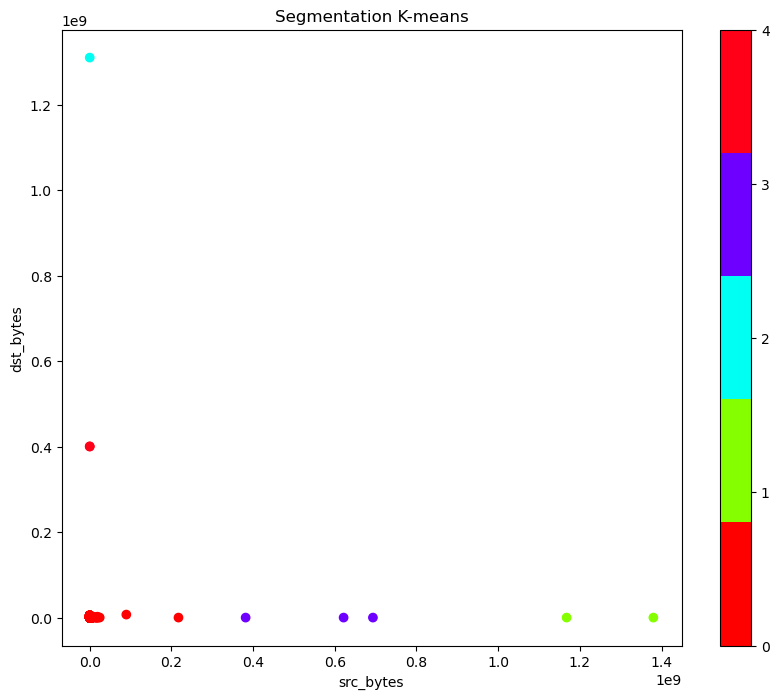

In [35]:
x_axis = df['src_bytes']
y_axis = df['dst_bytes']
plt.figure(figsize=(10, 8))
color_map = plt.cm.get_cmap('hsv', len(np.unique(df['k'])))
plt.xlabel('src_bytes')
plt.ylabel('dst_bytes')
scatter = plt.scatter(x_axis, y_axis, c=df['k'], cmap=color_map)
plt.title('Segmentation K-means')
plt.colorbar(scatter, ticks=np.unique(df['k']))
plt.show()

In [36]:
df

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,count,srv_count,dst_host_count,dst_host_srv_count,occurance,k
0,0,491,0,0,0,0,2,2,150,25,20,0
1,0,146,0,0,0,0,13,1,255,1,15,0
2,0,0,0,0,0,0,123,6,255,26,19,0
3,0,232,8153,0,0,0,5,5,30,255,21,0
4,0,199,420,0,0,0,30,32,255,255,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...
125979,0,0,0,0,0,0,184,25,255,25,20,0
125980,8,105,145,0,0,0,2,2,255,244,21,0
125981,0,2231,384,0,0,0,1,1,255,30,18,0
125982,0,0,0,0,0,0,144,8,255,8,20,0


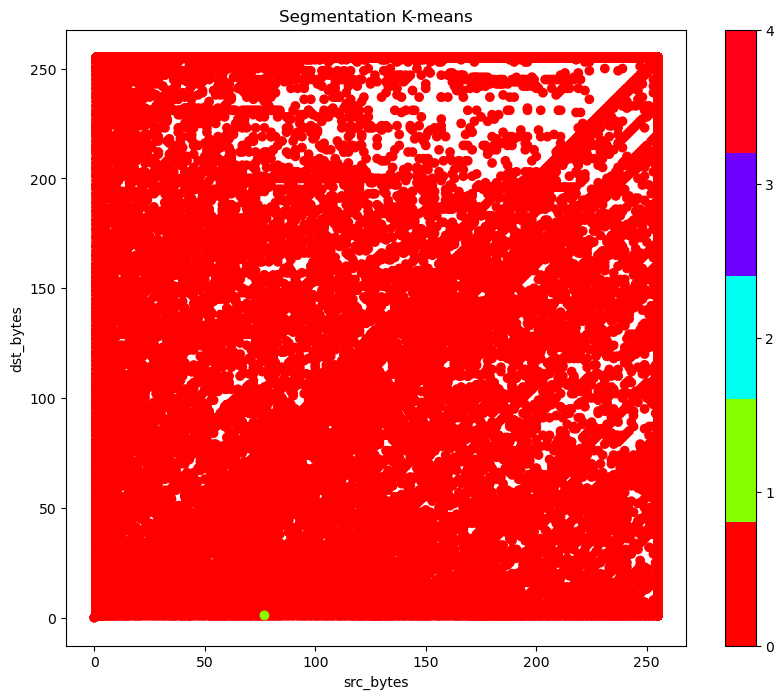

In [40]:
x_axis = df['dst_host_count']
y_axis = df['dst_host_srv_count']
plt.figure(figsize=(10, 8))
color_map = plt.cm.get_cmap('hsv', len(np.unique(df['k'])))
plt.xlabel('src_bytes')
plt.ylabel('dst_bytes')
scatter = plt.scatter(x_axis, y_axis, c=df['k'], cmap=color_map)
plt.title('Segmentation K-means')
plt.colorbar(scatter, ticks=np.unique(df['k']))
plt.show()

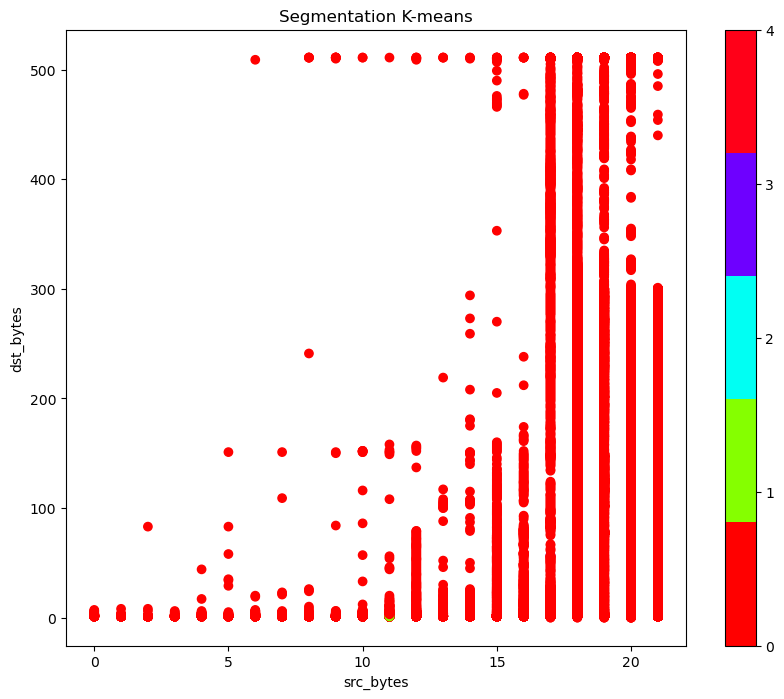

In [43]:
x_axis = df['occurance']
y_axis = df['count']
plt.figure(figsize=(10, 8))
color_map = plt.cm.get_cmap('hsv', len(np.unique(df['k'])))
plt.xlabel('src_bytes')
plt.ylabel('dst_bytes')
scatter = plt.scatter(x_axis, y_axis, c=df['k'], cmap=color_map)
plt.title('Segmentation K-means')
plt.colorbar(scatter, ticks=np.unique(df['k']))
plt.show()

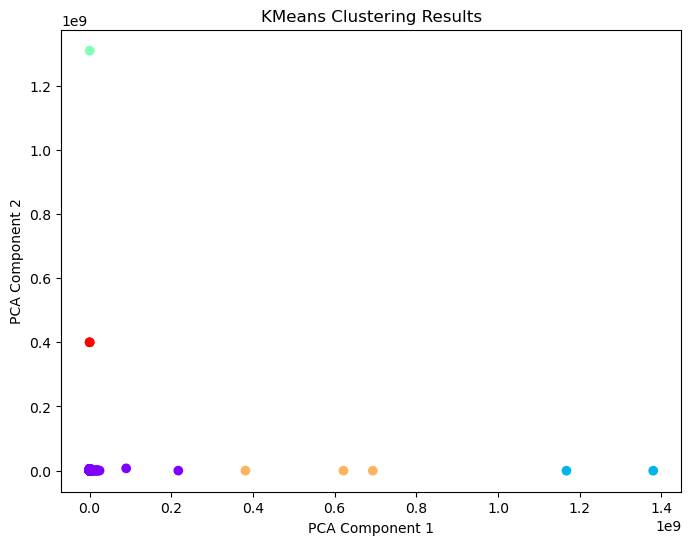

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title('KMeans Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()